# Logistic Regression on breast cancer dataset (with standardization)

## Library

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Dataset

In [32]:
from sklearn.datasets import load_breast_cancer

In [33]:
cancer = load_breast_cancer()

In [34]:
cancer

{'data': array([[1.799e+01, 1.038e+01, 1.228e+02, ..., 2.654e-01, 4.601e-01,
         1.189e-01],
        [2.057e+01, 1.777e+01, 1.329e+02, ..., 1.860e-01, 2.750e-01,
         8.902e-02],
        [1.969e+01, 2.125e+01, 1.300e+02, ..., 2.430e-01, 3.613e-01,
         8.758e-02],
        ...,
        [1.660e+01, 2.808e+01, 1.083e+02, ..., 1.418e-01, 2.218e-01,
         7.820e-02],
        [2.060e+01, 2.933e+01, 1.401e+02, ..., 2.650e-01, 4.087e-01,
         1.240e-01],
        [7.760e+00, 2.454e+01, 4.792e+01, ..., 0.000e+00, 2.871e-01,
         7.039e-02]]),
 'target': array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
        0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
        1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
        1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
        1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0

In [35]:
df = pd.DataFrame(data = cancer['data'],columns=cancer['feature_names'])
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [36]:
df['target'] = cancer['target']

In [37]:
df

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,0
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,0
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,0
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,0


In [38]:
x = df[df.columns[:-1]]
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [39]:
y = df[df.columns[-1:]]
y

,target
0,0
1,0
2,0
3,0
4,0
...,...
564,0
565,0
566,0
567,0


## Standardization

In [40]:
len(x)

569

In [41]:
# x['physical_score'].std()

In [42]:
# x['age'][3]

In [43]:
for i in x.columns:
    mean = x[i].mean()
    std = x[i].std()
    for j in range(len(x)):
        x[i][j] = (x[i][j] - mean) / std

x

C:\Users\HP\AppData\Local\Temp\ipykernel_10608\3130740032.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  x[i][j] = (x[i][j] - mean) / std


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


## Adding 'x0' column = 1 in x for coding purpose 

In [44]:
x['x0'] = 1
x

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,x0
0,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,2.253764,...,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312,1
1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,-0.867889,...,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943,1
2,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,-0.397658,...,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214,1
3,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,4.906602,...,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672,1
4,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,-0.561956,...,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,-0.930209,...,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467,1
565,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,-1.057681,...,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122,1
566,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,-0.894800,...,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129,1
567,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,1.042778,...,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684,1


In [45]:
columns = list()
columns.append(x.columns[-1])

for i in x.columns[:-1]:
    columns.append(i)
columns

['x0',
 'mean radius',
 'mean texture',
 'mean perimeter',
 'mean area',
 'mean smoothness',
 'mean compactness',
 'mean concavity',
 'mean concave points',
 'mean symmetry',
 'mean fractal dimension',
 'radius error',
 'texture error',
 'perimeter error',
 'area error',
 'smoothness error',
 'compactness error',
 'concavity error',
 'concave points error',
 'symmetry error',
 'fractal dimension error',
 'worst radius',
 'worst texture',
 'worst perimeter',
 'worst area',
 'worst smoothness',
 'worst compactness',
 'worst concavity',
 'worst concave points',
 'worst symmetry',
 'worst fractal dimension']

In [46]:
x[columns]

,x0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,1,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


In [47]:
x = x[columns]
x

,x0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,1.096100,-2.071512,1.268817,0.983510,1.567087,3.280628,2.650542,2.530249,2.215566,...,1.885031,-1.358098,2.301575,1.999478,1.306537,2.614365,2.107672,2.294058,2.748204,1.935312
1,1,1.828212,-0.353322,1.684473,1.907030,-0.826235,-0.486643,-0.023825,0.547662,0.001391,...,1.804340,-0.368879,1.533776,1.888827,-0.375282,-0.430066,-0.146620,1.086129,-0.243675,0.280943
2,1,1.578499,0.455786,1.565126,1.557513,0.941382,1.052000,1.362280,2.035440,0.938859,...,1.510541,-0.023953,1.346291,1.455004,0.526944,1.081980,0.854222,1.953282,1.151242,0.201214
3,1,-0.768233,0.253509,-0.592166,-0.763792,3.280667,3.399917,1.914213,1.450431,2.864862,...,-0.281217,0.133866,-0.249720,-0.549538,3.391291,3.889975,1.987839,2.173873,6.040726,4.930672
4,1,1.748758,-1.150804,1.775011,1.824624,0.280125,0.538866,1.369806,1.427237,-0.009552,...,1.297434,-1.465481,1.337363,1.219651,0.220362,-0.313119,0.612640,0.728618,-0.867590,-0.396751
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,2.109139,0.720838,2.058974,2.341795,1.040926,0.218868,1.945573,2.318924,-0.312314,...,1.899514,0.117596,1.751022,2.013529,0.378033,-0.273077,0.663928,1.627719,-1.358963,-0.708467
565,1,1.703356,2.083301,1.614511,1.722326,0.102368,-0.017817,0.692434,1.262558,-0.217473,...,1.535369,2.045599,1.420690,1.493644,-0.690623,-0.394473,0.236365,0.733182,-0.531387,-0.973122
566,1,0.701667,2.043775,0.672084,0.577445,-0.839745,-0.038646,0.046547,0.105684,-0.808406,...,0.560868,1.373645,0.578492,0.427529,-0.808876,0.350427,0.326479,0.413705,-1.103578,-0.318129
567,1,1.836725,2.334403,1.980781,1.733693,1.524426,3.269267,3.294046,2.656528,2.135315,...,1.959515,2.235958,2.301575,1.651717,1.429169,3.901415,3.194794,2.287972,1.917396,2.217684


## Train Test Split

In [48]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y,test_size=0.2,random_state=1234)

In [49]:
x_train

,x0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
518,1,-0.353937,-0.248696,-0.309438,-0.459740,1.808837,1.169396,-0.508648,0.105942,-0.374325,...,-0.252251,-0.212686,-0.236625,-0.361606,0.579501,0.265895,-0.707437,-0.076161,-0.515223,0.275960
551,1,-0.850525,0.732463,-0.842794,-0.785672,-0.049792,-0.424159,-0.508773,-0.679052,0.796597,...,-0.879159,0.420219,-0.876755,-0.779797,-1.036622,-0.483455,-0.555010,-0.767905,0.433579,-0.200751
111,1,-0.424878,0.341860,-0.404092,-0.495829,0.211156,0.313542,0.222036,0.290980,-0.279484,...,-0.608120,-0.033715,-0.543447,-0.620319,-0.160675,-0.186003,-0.242486,-0.062469,-1.090647,0.050616
64,1,-0.410690,1.057966,-0.381869,-0.442975,1.126250,0.413897,0.301063,0.510552,0.340630,...,0.169826,1.267890,0.135073,0.013554,2.309496,0.965033,0.624144,0.867058,0.779480,1.060512
443,1,-1.009433,-0.225445,-1.034983,-0.892232,-1.062297,-1.130806,-0.863892,-0.974391,2.044122,...,-1.102612,-0.385149,-1.128225,-0.903270,-1.507881,-1.200262,-1.113621,-1.405491,-0.326110,-0.918309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-0.078686,-0.955502,-0.122599,-0.191777,-0.085343,-0.519969,-0.552050,-0.304337,1.088416,...,-0.266734,-0.640589,-0.264599,-0.369861,-0.607408,-0.520318,-0.606777,-0.223272,0.087678,-0.820863
372,1,2.055224,-0.974102,2.030166,2.077526,0.265905,0.892947,1.309595,1.973589,0.588676,...,1.328469,-0.624319,1.334387,1.149396,-0.576750,0.188990,0.624144,1.247389,-0.276002,0.150276
204,1,-0.470281,-0.160345,-0.447716,-0.491566,0.233908,0.027626,-0.109751,-0.275989,0.413585,...,-0.268803,-0.168757,-0.333642,-0.355986,0.448109,-0.104649,-0.024391,-0.199388,0.183043,0.196785
53,1,1.161365,-0.137095,1.165932,1.074441,1.311117,0.836143,1.108892,1.471048,1.022757,...,0.896047,-0.251734,0.828473,0.773534,-0.191333,-0.156131,-0.047399,0.272222,0.194358,-0.225666


In [50]:
y_train

,target
518,1
551,1
111,1
64,0
443,1
...,...
279,1
372,0
204,1
53,0


# Logistic Regression

## Initializing weights

In [51]:
n = len(x_train.columns)
n

31

In [52]:
w = np.zeros(n)
w

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

## Adjusting Weights

In [53]:
import math
math.exp(1)

2.718281828459045

In [54]:
len(w)

31

In [55]:
x_train

,x0,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
518,1,-0.353937,-0.248696,-0.309438,-0.459740,1.808837,1.169396,-0.508648,0.105942,-0.374325,...,-0.252251,-0.212686,-0.236625,-0.361606,0.579501,0.265895,-0.707437,-0.076161,-0.515223,0.275960
551,1,-0.850525,0.732463,-0.842794,-0.785672,-0.049792,-0.424159,-0.508773,-0.679052,0.796597,...,-0.879159,0.420219,-0.876755,-0.779797,-1.036622,-0.483455,-0.555010,-0.767905,0.433579,-0.200751
111,1,-0.424878,0.341860,-0.404092,-0.495829,0.211156,0.313542,0.222036,0.290980,-0.279484,...,-0.608120,-0.033715,-0.543447,-0.620319,-0.160675,-0.186003,-0.242486,-0.062469,-1.090647,0.050616
64,1,-0.410690,1.057966,-0.381869,-0.442975,1.126250,0.413897,0.301063,0.510552,0.340630,...,0.169826,1.267890,0.135073,0.013554,2.309496,0.965033,0.624144,0.867058,0.779480,1.060512
443,1,-1.009433,-0.225445,-1.034983,-0.892232,-1.062297,-1.130806,-0.863892,-0.974391,2.044122,...,-1.102612,-0.385149,-1.128225,-0.903270,-1.507881,-1.200262,-1.113621,-1.405491,-0.326110,-0.918309
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,1,-0.078686,-0.955502,-0.122599,-0.191777,-0.085343,-0.519969,-0.552050,-0.304337,1.088416,...,-0.266734,-0.640589,-0.264599,-0.369861,-0.607408,-0.520318,-0.606777,-0.223272,0.087678,-0.820863
372,1,2.055224,-0.974102,2.030166,2.077526,0.265905,0.892947,1.309595,1.973589,0.588676,...,1.328469,-0.624319,1.334387,1.149396,-0.576750,0.188990,0.624144,1.247389,-0.276002,0.150276
204,1,-0.470281,-0.160345,-0.447716,-0.491566,0.233908,0.027626,-0.109751,-0.275989,0.413585,...,-0.268803,-0.168757,-0.333642,-0.355986,0.448109,-0.104649,-0.024391,-0.199388,0.183043,0.196785
53,1,1.161365,-0.137095,1.165932,1.074441,1.311117,0.836143,1.108892,1.471048,1.022757,...,0.896047,-0.251734,0.828473,0.773534,-0.191333,-0.156131,-0.047399,0.272222,0.194358,-0.225666


In [56]:
x_train.iloc[0,2]

-0.2486955616756108

In [57]:
y_train

,target
518,1
551,1
111,1
64,0
443,1
...,...
279,1
372,0
204,1
53,0


In [58]:
y_train.iloc[1,0]

1

In [59]:
# math.log is what we interpret ln in math
math.log(10)

2.302585092994046

In [61]:
count_list = list()
loss_list = list()

for count in range(1,1001):

    count_list.append(count)

    
    # calculating predicted value (pre threshold) using sigmoid function

    linear_sum = 0
    y_cap = list()

    for j in range(len(x_train)):
        for i in range(len(x_train.columns)):
            linear_sum = linear_sum + w[i] * x_train.iloc[j,i]

        predicted_value = 1 / (1 + math.exp(-1*linear_sum))
        y_cap.append(predicted_value)
        linear_sum = 0


    # calculating average loss

    loss_sum = 0

    for i in range(len(y_train)):
        loss = -1 * y_train.iloc[i,0] * math.log(y_cap[i]) - (1 - y_train.iloc[i,0]) * math.log(1 - y_cap[i])
        loss_sum = loss_sum + loss

    avg_loss = loss_sum / len(y_train)
    loss_list.append(avg_loss)


    # optimizing with gradient descent

    gradient_sum = 0
    dw_list = list()

    for i in range(len(x.columns)):
        for j in range(len(x_train)):
            gradient_sum = gradient_sum + (y_cap[j] - y_train.iloc[j,0]) * x_train.iloc[j,i]
        dw = gradient_sum / len(x_train)
        dw_list.append(dw)
        gradient_sum = 0


    # updating weights

    learning_rate = 0.2

    for i in range(len(dw_list)):
        w[i] = w[i] - learning_rate * dw_list[i]


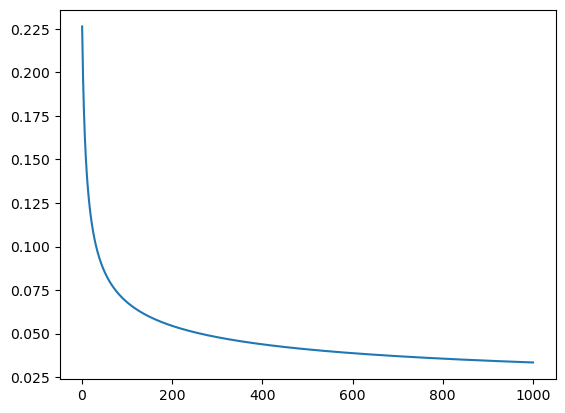

In [62]:
plt.plot(count_list,loss_list)

In [63]:
loss_list

[0.22642708546460993,
 0.21027232770618987,
 0.19730805087233547,
 0.18660254618959682,
 0.1775710880566746,
 0.16982381931304594,
 0.16308832809423612,
 0.15716707152129702,
 0.1519124690462588,
 0.1472115666053908,
 0.14297617416740105,
 0.13913628199762182,
 0.13563552248829713,
 0.13242795509939642,
 0.12947573490354175,
 0.12674738799742954,
 0.12421651398015182,
 0.12186079534034218,
 0.11966123142210186,
 0.11760153931344491,
 0.1156676805066896,
 0.11384748347240614,
 0.11213034016772344,
 0.11050696009313848,
 0.10896916954298971,
 0.1075097466387288,
 0.10612228490977078,
 0.10480107981171108,
 0.10354103379719569,
 0.10233757648714623,
 0.10118659720530017,
 0.1000843876918909,
 0.09902759324270932,
 0.09801317085713343,
 0.09703835324480024,
 0.09610061775174854,
 0.09519765943539266,
 0.09432736765292471,
 0.09348780563684957,
 0.09267719261980842,
 0.09189388814289895,
 0.09113637824067676,
 0.09040326324448078,
 0.0896932469857437,
 0.08900512721409565,
 0.08833778707266

In [64]:
y_cap

[0.976949755151608,
 0.9999639231782439,
 0.9974178300267875,
 0.0006387239775499665,
 0.999999531837894,
 0.010319067875105102,
 0.9999996742091721,
 0.9996191540000854,
 0.9998722324434526,
 0.9998913587984225,
 3.3586973640908993e-10,
 0.9997149731816984,
 0.01315128105461964,
 0.012862603454310078,
 0.9999451619479366,
 0.9999824514057059,
 0.6342334846205763,
 0.9994809487607704,
 3.625433646436636e-15,
 0.9999977994604434,
 0.5100762072677419,
 0.9986158157186206,
 0.9980493813292983,
 0.7434243427675524,
 0.9999910940242677,
 0.006254276567455495,
 0.9999999996296813,
 1.244587653975714e-12,
 0.019960592642824848,
 0.9693606508290922,
 0.004865861644480131,
 0.9991138673134332,
 0.3241191754899718,
 0.9961326896054611,
 0.002632772463497434,
 0.40413511185588313,
 0.9798205587700243,
 0.9998999801931983,
 1.3150667071127155e-07,
 0.9996010771569042,
 0.9998697594516787,
 0.03981242255762568,
 0.957920884589945,
 3.7330666083096247e-06,
 1.1737155030843984e-10,
 0.999935246254551

In [65]:
w

array([ 0.80157267, -0.75519631, -0.85558539, -0.73214698, -0.79649369,
       -0.32171954,  0.15953089, -0.84806211, -0.86390021, -0.09044314,
        0.58284242, -1.11017729,  0.21202307, -0.80139482, -0.97556672,
       -0.29573772,  0.70975257, -0.0407062 , -0.22477809,  0.43907562,
        0.59577038, -1.03158946, -1.13125485, -0.91835893, -1.04715641,
       -1.26742475, -0.07342087, -0.95066575, -0.92405812, -0.77667676,
       -0.29188656])

## Training Accuracy

just checking if the updated weights after 300 iterations are performing well on train dataset

In [66]:
# calculating predicted value (post threshold) using sigmoid function

linear_sum = 0
y_cap = list()

for j in range(len(x_train)):
    for i in range(len(x_train.columns)):
        linear_sum = linear_sum + w[i] * x_train.iloc[j,i]

    predicted_value = 1 / (1 + math.exp(-1*linear_sum))

    if predicted_value >= 0.5:
        final_result = 1
    else:
        final_result = 0

    y_cap.append(final_result)
    linear_sum = 0

y_cap

[1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,


In [67]:
len(y_cap)

455

In [68]:
# measuring accuracy

right = 0
wrong = 0

for i in range(len(y_train)):
    if y_cap[i] == y_train.iloc[i,0]:
        right = right + 1
    else:
        wrong = wrong + 1

accuracy = ( right * 100 ) / len(y_train)

print('Total :',len(y_train))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 455
Right : 452
Wrong : 3
Accuracy : 99.34065934065934


## Test Accuracy

In [69]:
# calculating predicted value (post threshold) using sigmoid function

linear_sum = 0
y_cap = list()

for j in range(len(x_test)):
    for i in range(len(x_test.columns)):
        linear_sum = linear_sum + w[i] * x_test.iloc[j,i]

    predicted_value = 1 / (1 + math.exp(-1*linear_sum))

    if predicted_value >= 0.5:
        final_result = 1
    else:
        final_result = 0

    y_cap.append(final_result)
    linear_sum = 0

y_cap

[1,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0]

In [70]:
len(y_cap)

114

In [71]:
# measuring accuracy

right = 0
wrong = 0

for i in range(len(y_test)):
    if y_cap[i] == y_test.iloc[i,0]:
        right = right + 1
    else:
        wrong = wrong + 1

accuracy = ( right * 100 ) / len(y_test)

print('Total :',len(y_test))
print('Right :',right)
print('Wrong :',wrong)
print('Accuracy :',accuracy)

Total : 114
Right : 109
Wrong : 5
Accuracy : 95.6140350877193
